Neurone Leaky Integrate and Fire

In [77]:
import numpy as np
import matplotlib.pyplot as plt

tau_m = 20e-3     # 20 ms
dt = 1e-3          # 1 ms
T = 1.0            # Simulation sur 1 seconde
time_steps = int(T/dt) # 1000 nombre de pas à effectuer 


V_rest = 0.0 # potentiel initial
V_reset = 0.0 # potentiel de reset 
V_th = 0.03 # treshold 

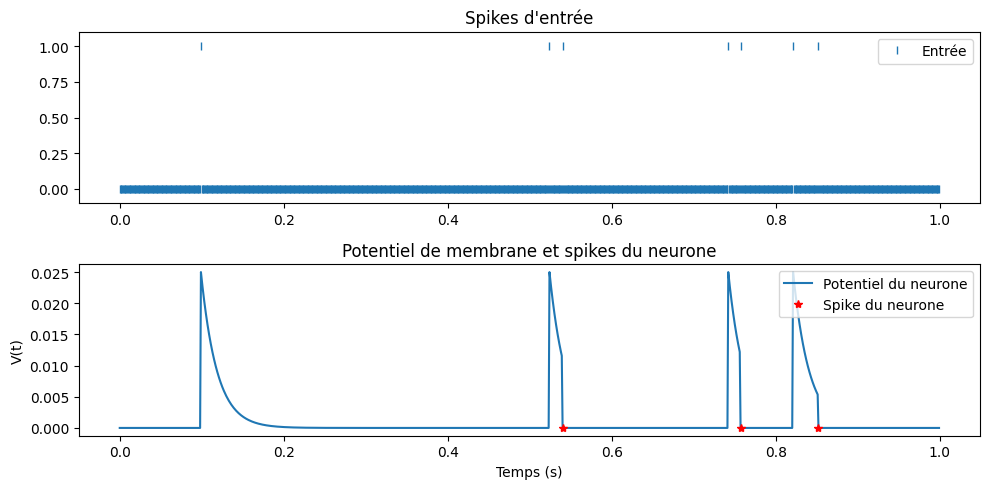

In [ ]:
np.random.seed(0) # pour avoir le même aléatoire à chaque fois

time = np.arange(time_steps)*dt # matrice du nombre total de pas de temps de la simulation => matrice de 1000 valeurs 


w = 0.5 # poids synaptique, plus il est gros plus le spike aura d'importance
input_rate = 10 # fréquence en Hz, nombre de spike par seconde
prob_spike = input_rate * dt # proba d'avoir un spike sur le laps de temps dt = 1%

# génération des spikes 
x = (np.random.rand(time_steps))

# si la valeur est inf a prob_spike alors on la mets à 1 sinon à 0 
# => spike à des moments ou non avec matrice que de 0 ou 1 a parcourir donc
x = (x < prob_spike).astype(float)

V = np.zeros(time_steps) # matrice du potentiel membrane
V[0] = V_rest # potentiel initiale correspond au potentiel repos (soit 0 ici)
spikes = np.zeros(time_steps) # matrice pour stocker les spikes émis par le neurone

for t in range(1, time_steps):
    I = w * x[t] # valeur de l'input, courant d'entrée à cet instant t
    ## méthode d'Euler sur le LIF 
    dV = ((-(V[t-1] - V_rest)) + I)*(dt/tau_m)
    V[t] = V[t-1] + dV # met à jour le potentiel du neurone 

    if V[t] >= 0.03: # plus haut que le seuil pourquoi 0.03 car ça oblige à avoir deux signaxu proche pou déclencher le seuil
        spikes[t] = 1.0
        V[t] = V_reset # reset du potentiel


# Affichage
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(time, x, '|', label="Entrée")
plt.ylim(-0.1,1.1)
plt.title("Spikes d'entrée")
plt.legend()

plt.subplot(2,1,2)
plt.plot(time, V, label="Potentiel du neurone")
plt.plot(time[spikes==1], V[spikes==1], 'r*', label="Spike du neurone")
plt.title("Potentiel de membrane et spikes du neurone")
plt.xlabel("Temps (s)")
plt.ylabel("V(t)")
plt.legend()
plt.tight_layout()
plt.show()


Avec deux neurones + plasticité synaptique (simplifié)

Poids finaux: 0.535 0.505


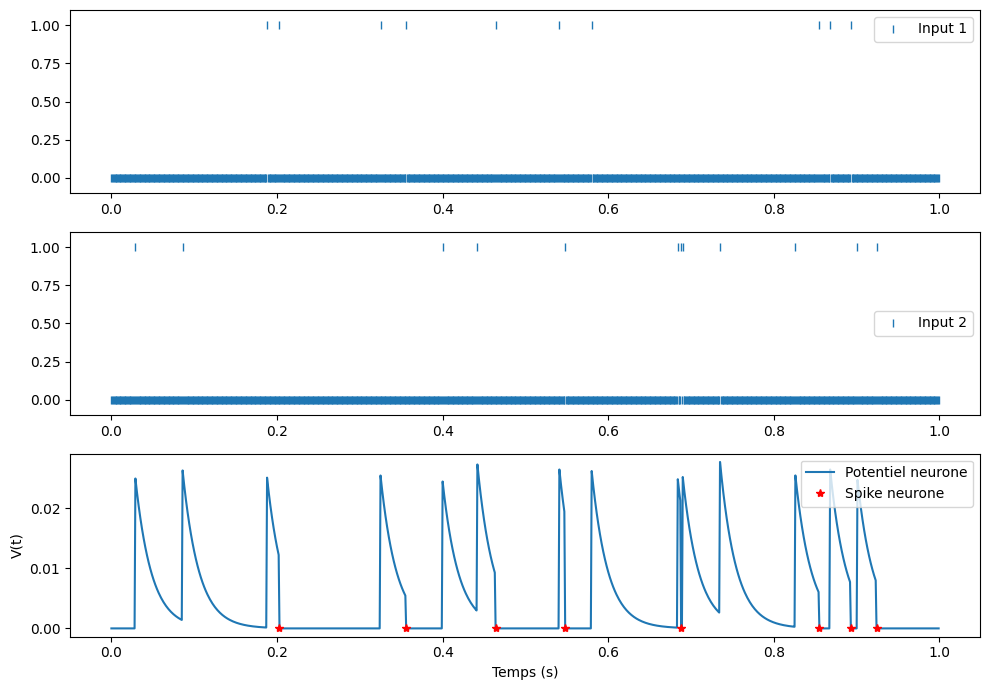

In [80]:
np.random.seed(2)

w1, w2 = 0.5, 0.5
learning_rate = 0.01

input_rate_1 = 10
input_rate_2 = 10
prob_spike_1 = input_rate_1 * dt
prob_spike_2 = input_rate_2 * dt

x1 = (np.random.rand(time_steps) < prob_spike_1).astype(float)
x2 = (np.random.rand(time_steps) < prob_spike_2).astype(float)

V = np.zeros(time_steps)
V[0] = V_rest
spikes = np.zeros(time_steps)

for t in range(1, time_steps):
    I = w1 * x1[t] + w2 * x2[t]
    dV = (-(V[t-1]-V_rest) + I)*(dt/tau_m)
    V[t] = V[t-1] + dV
    
    if V[t] >= V_th:
        spikes[t] = 1.0
        V[t] = V_reset
        
        # Apprentissage simple : 
        # On regarde si x1[t] ou x1[t-1] était 1, si oui on augmente w1, sinon on le diminue un peu
        if x1[t] == 1.0 or x1[t-1] == 1.0:
            w1 += learning_rate
        else:
            w1 -= learning_rate*0.5

        if x2[t] == 1.0 or x2[t-1] == 1.0:
            w2 += learning_rate
        else:
            w2 -= learning_rate*0.5

        w1 = np.clip(w1, 0.0, 2.0)
        w2 = np.clip(w2, 0.0, 2.0)

print("Poids finaux:", w1, w2)

plt.figure(figsize=(10,7))
plt.subplot(3,1,1)
plt.plot(time, x1, '|', label="Input 1")
plt.ylim(-0.1,1.1)
plt.legend()

plt.subplot(3,1,2)
plt.plot(time, x2, '|', label="Input 2")
plt.ylim(-0.1,1.1)
plt.legend()

plt.subplot(3,1,3)
plt.plot(time, V, label="Potentiel neurone")
plt.plot(time[spikes==1], V[spikes==1], 'r*', label="Spike neurone")
plt.legend()
plt.xlabel("Temps (s)")
plt.ylabel("V(t)")
plt.tight_layout()
plt.show()
